<a href="https://colab.research.google.com/github/georgezoto/TensorFlow-in-Practice/blob/master/C3W3_4_5_Sarcasm_with_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# C3W3-4-Sarcasm with Bidirectional LSTM

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

--2020-04-23 16:17:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  16.2MB/s    in 0.3s    

2020-04-23 16:17:45 (16.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np

num_epochs = 10

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4547 - accuracy: 0.7683 - val_loss: 0.3891 - val_accuracy: 0.8165
Epoch 2/10
625/625 [==============================] - 8s 14ms/step - loss: 0.3610 - accuracy: 0.8360 - val_loss: 0.3925 - val_accuracy: 0.8186
Epoch 3/10
625/625 [==============================] - 8s 14ms/step - loss: 0.3383 - accuracy: 0.8482 - val_loss: 0.3960 - val_accuracy: 0.8129
Epoch 4/10
625/625 [==============================] - 8s 14ms/step - loss: 0.3240 - accuracy: 0.8547 - val_loss: 0.3796 - val_accuracy: 0.8298
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3120 - accuracy: 0.8613 - val_loss: 0.3768 - val_accuracy: 0.8317
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3035 - accuracy: 0.8663 - val_loss: 0.3716 - val_accuracy: 0.8350
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2969 - accuracy: 0.8677 - val_loss: 0.3815 - val_accuracy: 0.8241

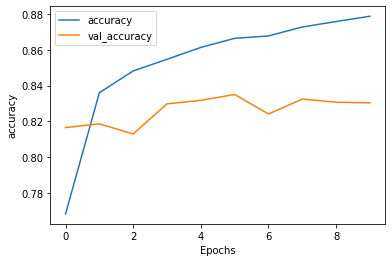

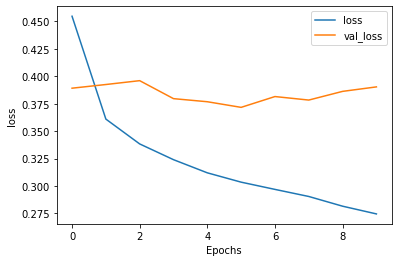

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model.save("C3W3-4-Sarcasm_with_Bidirectional_LSTM.h5")

# C3W3-5-Sarcasm with 1D Convolutional Layer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4715 - accuracy: 0.7578 - val_loss: 0.4229 - val_accuracy: 0.8071
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3579 - accuracy: 0.8384 - val_loss: 0.3917 - val_accuracy: 0.8229
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3165 - accuracy: 0.8589 - val_loss: 0.3902 - val_accuracy: 0.8219
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2799 - accuracy: 0.8791 - val_loss: 0.4029 - val_accuracy: 0.8190
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2439 - accuracy: 0.8964 - val_loss: 0.4383 - val_accuracy: 0.8214
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2101 - accuracy: 0.9145 - val_loss: 0.4600 - val_accuracy: 0.8135
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1717 - accuracy: 0.9337 - val_loss: 0.5334 - val_accuracy: 0.8111
Epoch 

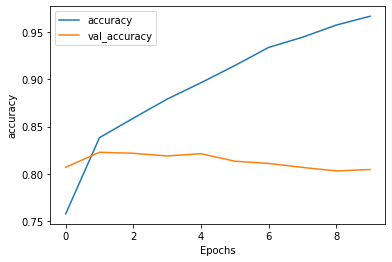

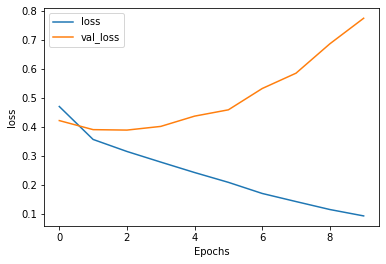

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model.save("C3W3-5-Sarcasm_with_1D_Convolutional_Layer.h5")